# POLI 381 Data Project 2: Correlation


## Are elections becoming more competitive or less competitive?

Correlation: Correlate your measure of electoral competitiveness with electoral turnout. Is turnout higher at more competitive elections?
A couple of notes on Part B of your data projects

---

Part B of your data project involves illustrating the relationship between two variables, your dependent variable (Y), and an independent variable, (X). Some of the project descriptions state what this independent variable must be, but others leave it to you to decide; re-read the project descriptions before starting the assignment.

<br>

- Element 1: Theoretical Conjecture
    - [x] Is turnout higher at more competitive elections?
    - [x] Provide a brief rationale for why one might expect electoral turnout to be related to electoral competitiveness,
    - [x] with some sensitivity to alternative hypotheses, spurious correlation, or endogeneity (i.e., reverse causation).
    - [x] Consider non-linear relationships or temporal lag effects in the theorized relationship.
    - [x] 1-2 paragraphs

<br>

- Element 2: Definition and Operationalization of X
    - [x] Explicitly define and explain the measurement of the independent variable.
    - [x] Identify the data source.
    - [x] 2 paragraphs
    - [x] You can add a brief paragraph here on Y, your dependent variable

<br>

- Element 3: Quality Control of X
Verify the data quality. This includes assessing whether the observed data cover the theoretical
range of the QOI, exhibits gaps in that range, or is subject to skewness and/or outliers (i.e.,
extreme values).
 Utilize appropriate graphics and/or tables for these diagnostic purposes, and present these
graphics and tables in accordance with the principles discussed in class
    - [x] Conduct quality control on the independent variable,just as you did with your dependent variable.
    - [x] Understand that measurement errors are more critical with independent variables.
    - [x] 2-3 tables / graphics with 1 paragraph of explanation for each table / graphic.

<br>

- Element 4: Relationship Between Y and X
    - [ ] Use appropriate techniques to explore the bivariate relationship between Y and X.
    - [x] Consider temporal relationships, non-linearities, outliers.
    - [ ] 3-4 paragraphs
    - [x] 2-3 tables / graphics with 1 paragraph of explanation for each table / graphic. 

<br>

- Grading:
    - [ ] Failure to complete all four elements and/or less than competent execution of one or more elements < 3.
    - [ ] simply handing in a scatterplot + 1-2 paragraphs = 2 or less!
    - [ ] Perfunctory but competent completion of all 4 elements = 3.
    - [ ] Attention to detail in completion and execution of all 4 elements = 4.
    - [ ] Above + originality in data collection, measurement and analysis = 5.

---

- [x] Should you append Part A to Part B?  I prefer not because of the amount of material involved.  However, you can add a paragraph to Part B that reminds Dashleen and me what your dependent variable is.
- [ ] Be concise!
- [ ] That's a maximum of 10 paragraphs (40-50 sentences, maybe 600 words) + 6 tables and graphs (the latter of which can be compressed efficiently via facets etc.)   That adds up to perhaps 5 pages.
- [ ] to improve conciseness:
    - [ ] Use informative section headings to describe the content of the next set of paragraphs and to link sections together. 
    - [ ] Use informative titles, subtitles, and notes to describe the nature and source of tables and graphics. 


---

FEEDBACK:
- [ ] Poll ratings may not translate completely into a win margin, so that could be a grey area- its a good idea to enlist the shortcomings of your measure.
- [x] or year year? Why this cutoff?
- [x] what is the logic behind this grouping? what is the basis for it?
- [x] Title for the graph and note with the source of the data
- [x] Are you only considering two candidates? means may vary with how any number of candidates you are considering- standardizing would be good idea in that case

## The Independent Variable X (Theoretical Conjecture)

Electoral turnout can have many definitions, such as the proportion of eligible voters who actually cast their ballots(). In the US, electoral turnout is often theorized to be positively related to electoral competitiveness for several reasons. In highly competitive elections where the outcome is uncertain, political parties and candidates are motivated to mobilize their supporters and increase voter turnout to secure victory. This can lead to greater efforts in voter registration and canvassing. These activities tend to generate more media attention, public discourse, and political debates, which may increase voter engagement and motivation to participate in the electoral process. In closely contested races especially, individuals may perceive their votes as having a greater impact on the outcome.

However, it's important to consider alternative hypotheses and potential pitfalls. While there may be a correlation between electoral competitiveness and turnout, it's essential to recognize that correlation does not imply causation. Other unobserved factors, such as demographic characteristics, political culture, or historical trends, could drive both variables independently. In such case, these variables are both driven by something in the model that is not accounted for (endogeneity). We can also consider a non-linear relationship between electoral competitiveness and turnout. For example, increased competitiveness may initially lead to higher turnout rates, but beyond a certain threshold, further increases in competitiveness may have diminishing returns on turnout as voters may feel overwhelmed or disengaged by highly contentious campaigns. This can take place within the same electoral season, or may even happen over the course of years, which indicates the potential for both variables to have a temporal lag effect on each other.  


## Operationalization of X
This project will explore the correlation between electoral competitiveness and turnout. The data for electoral turnout was sourced from University of Florida's Election Lab (McDonald), which defines electoral turnout as the proportion of the voting eligible population (VEP) that actually votes in an election. They further define VEP as an estimate of those eligible to vote in an election, calculated by the voting-age population minus ineligible non-citizens and felons (McDonald). As there is no national central agency that provides electoral statistics, a University publication was one of the next best credible sources to turn to. This dataset contains turnout rates for both presidential and midterm elections from 1789 - 2020. To measure electoral turnout from this data, only data for presidential election turnouts will be used, as the polling average data is also limited to presidential elections. Additionally, only data from 1972-2016 will be used, as this is the time span measured in the polling average data. 

One shortfall of this operationalization of electoral turnout is that the data are national aggregates, not data for each state. There was no information found on how each state's turnout contributed to the national turnout average. This may undermine the procedure taken in operationalizing electoral competitiveness to account for the differences in population and assigned electoral votes related to each state. For electoral competitiveness, daily candidate poll ratings per state were aggregated from April 9th to election day, as this was the earliest data collection date all election years had in common. The states were then grouped into 9 geographic divisions based on Census Regions, and each region was given a weighting based on the number of electoral votes of all its comprising states. National polling ratings per election were calculated as weighted averages of divisional ratings, and the standard deviation of these ratings served as a measure of election competitiveness.


## Quality Control of X



## The Relationship between X and Y

In [4]:
library(dplyr)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 10)

In [63]:
rating_stats <- read.csv("../data/scaled_summary_stats.csv")
rating_weighted_avgs <- read.csv("../data/scaled_weighted_averages.csv")
raw_turnout <- read.csv("../data/turnout.csv")

In [64]:
# select only presidential election turnout, rename columns, select only the years 1972 - 2016
turnout_pres <- raw_turnout |> 
                select(YEAR,TURNOUT_RATE_PRES) |>
                rename(election_year = YEAR, turnout = TURNOUT_RATE_PRES) |> 
                filter(election_year >= 1972, election_year < 2020) 

# check which years have NA data
na_rows <- turnout_pres %>%
  filter(rowSums(is.na(.)) > 0)
# na_rows

# check which years had presidential elections
pres_elect_years <- unique(rating_weighted_avgs$election_year)
# pres_elect_years

# safely drop all rows with NA data, which correspond to midterm election turnouts
filtered_turnout <- turnout_pres %>%
    filter(!is.na(turnout)) 
# filtered_turnout

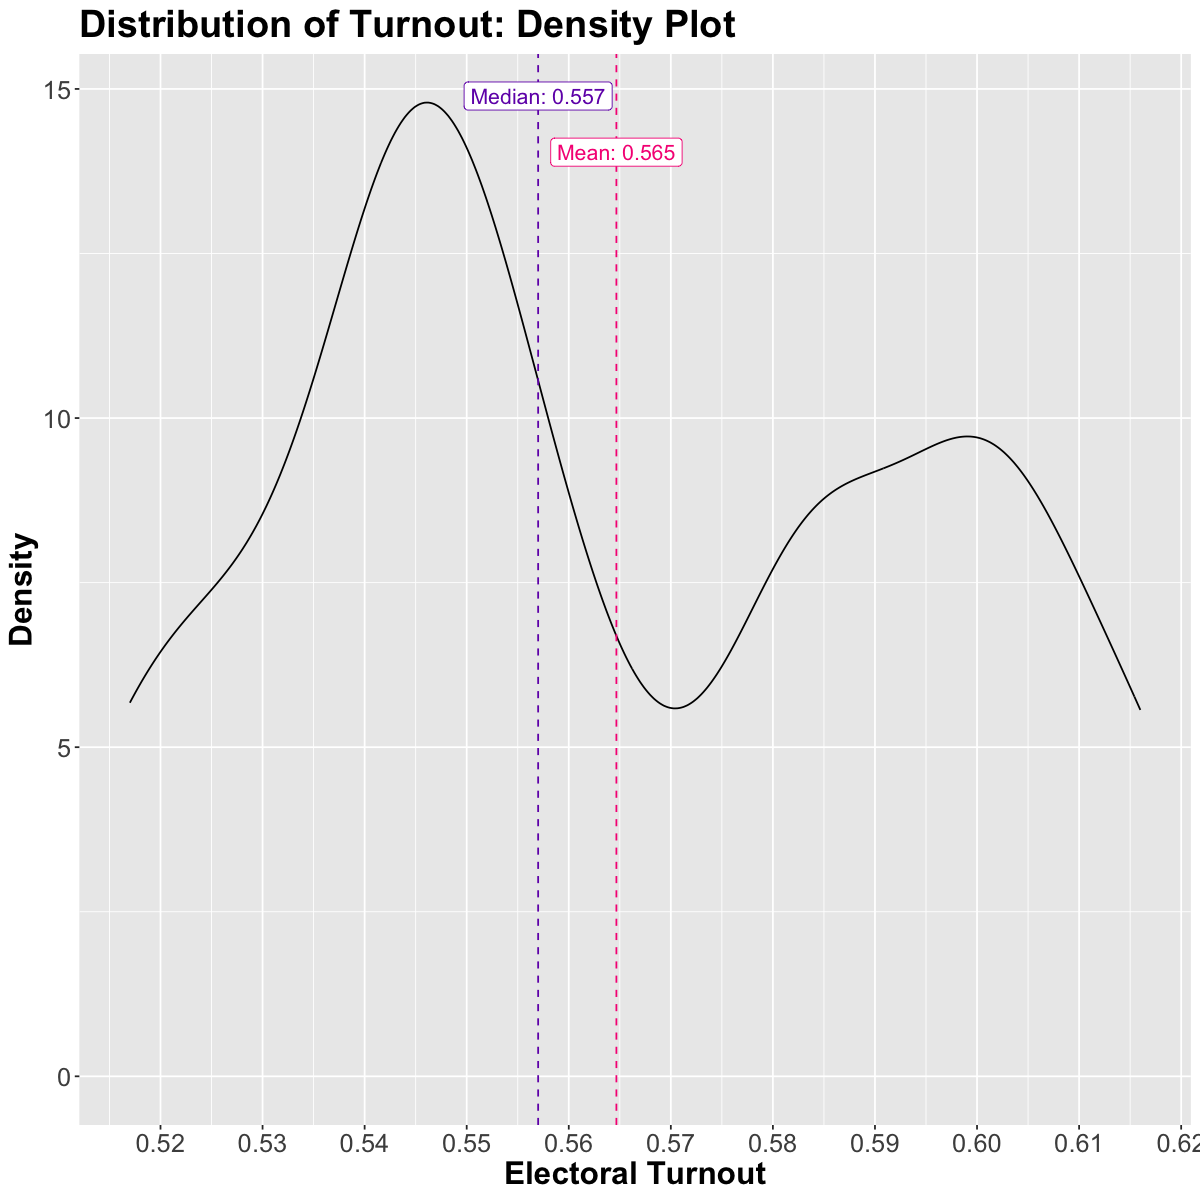

In [65]:
# Create a kernel density plot for turnout 
med <- median(filtered_turnout$turnout)
mean <- mean(filtered_turnout$turnout)

# Create the density plot
turnout_distribution <- ggplot(filtered_turnout, aes(x = turnout)) + 
    geom_density(adjust = 0.5) +
    geom_vline(xintercept = med, linetype = "dashed", color = "#7209b7") +  # Add median line 
    annotate(x=med,y=+Inf,label = paste("Median:", round(med, 3)),
             vjust = 2, geom = "label", size = 4.5, color = "#7209b7") + # Label median line
    geom_vline(xintercept = mean, linetype = "dashed", color = "#f72585") +  # Add mean line
    annotate(x=mean,y=+Inf,label=paste("Mean:", round(mean, 3)),
             vjust = 4, geom = "label", size = 4.5, color = "#f72585") + # Label mean line
    labs(title = "Distribution of Turnout: Density Plot", x = "Electoral Turnout", y = "Density") +
    theme(
        text = element_text(size = 19),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")) +
    scale_x_continuous(breaks = seq(0.51, 0.62, 0.01))  
turnout_distribution
ggsave("../pt_2/img_turnout_density.png", plot = turnout_distribution, width = 10, height = 10) 

In [66]:
# Create a QQ Plot for turnout
# Open a PNG device
png("../pt_2/img_qq_turnout.png", width = 800, height = 600)  # Adjust width and height as needed

# Create a qq plot
qqnorm(filtered_turnout$turnout, main = "QQ Plot of Turnout Data")

# Add qqline to plot
qqline(filtered_turnout$turnout, col = "#f72585")

# Add grid lines
grid()

# Close the PNG device
dev.off()

pdf 
  2

In [84]:
# rename columns to reflect they are related to the ratings not turnout
# rating_stats <- rename(rating_stats, rating_mean = mean, rating_median = median, rating_std = std, rating_variance = variance, rating_kurtosis = kurtosis) 
 
# merge the two dataframes together 
merged_df <- merge(filtered_turnout, rating_stats, by = "election_year")
merged_df$turnout_scaled <- scale(merged_df$turnout)
merged_df

election_year,turnout,rating_mean,rating_median,rating_std,rating_variance,rating_kurtosis,num_candidates,turnout_scaled
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,"<dbl[,1]>"
1972,0.562,0.4000000,0.400,1.343502884,1.805000,1.0,2,-0.08399716
1976,0.548,0.2100000,0.210,0.127279221,0.016200,1.0,2,-0.52498222
1980,0.542,-0.6133333,-0.160,1.027926716,1.056633,1.5,3,-0.71397582
1984,0.552,0.5050000,0.505,0.912167748,0.832050,1.0,2,-0.39898649
1988,0.528,0.4350000,0.435,0.007071068,0.000050,1.0,2,-1.15496089
1992,0.581,-0.4500000,-0.270,0.523736575,0.274300,1.5,3,0.51448258
1996,0.517,-0.5366667,-0.060,1.387816030,1.926033,1.5,3,-1.50144916
2000,0.542,-0.5966667,0.130,1.608239203,2.586433,1.5,3,-0.71397582
2004,0.601,0.5350000,0.535,0.219203102,0.048050,1.0,2,1.14446125


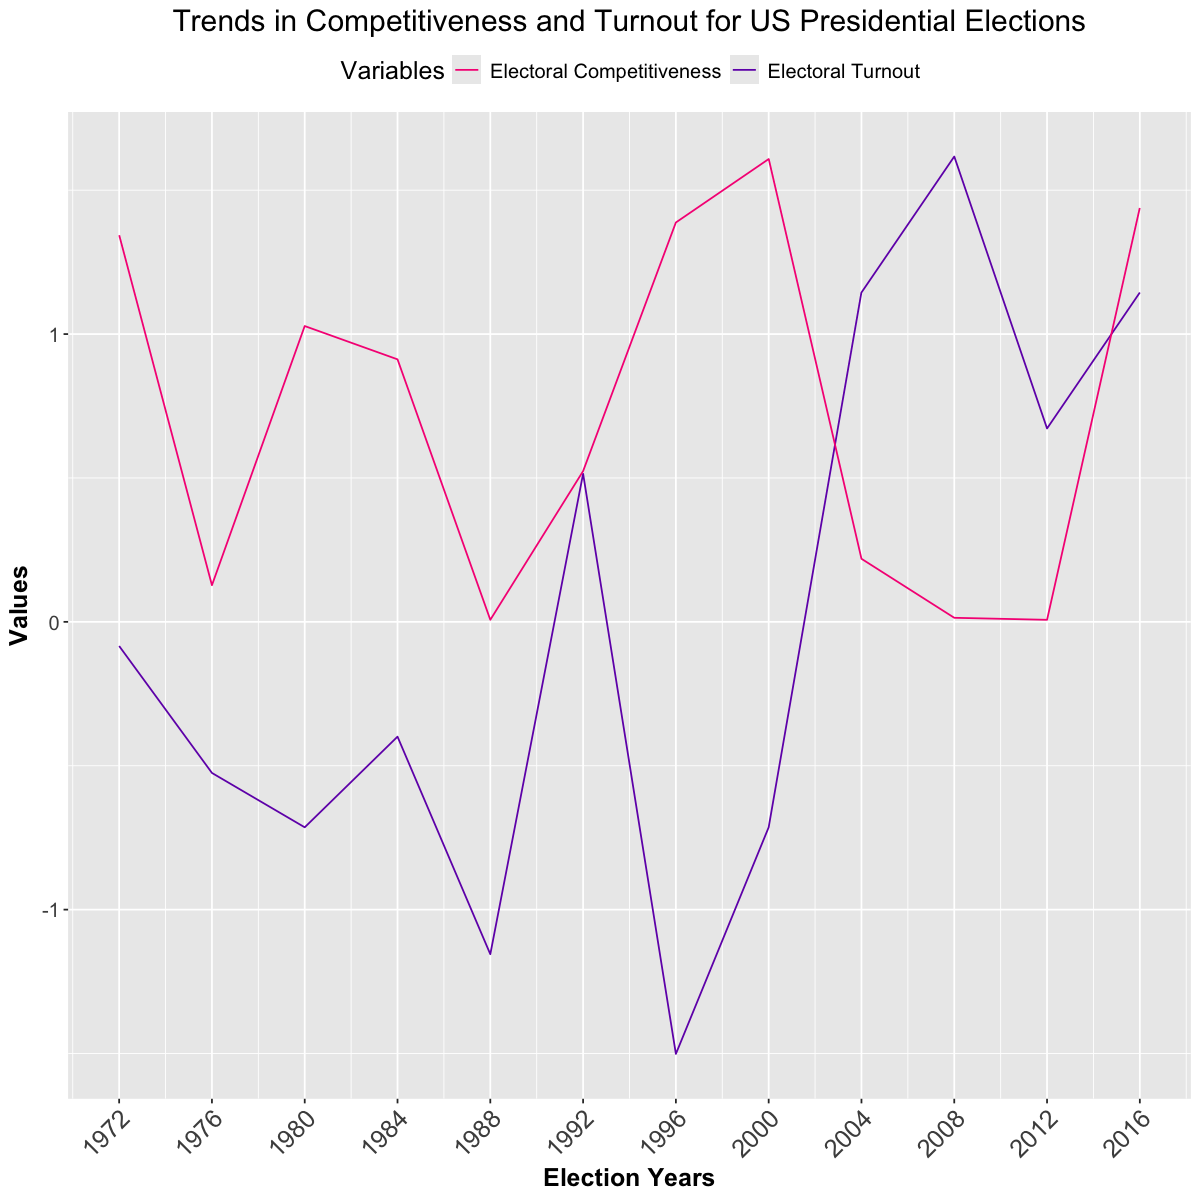

In [93]:
# Define sequence of values to be x axis labels
x <- seq(1972,2016,length.out = 12)

turnout_v_med <- ggplot(merged_df, aes(x = election_year)) +
  geom_line(aes(y = turnout_scaled, color = "Electoral Turnout")) +
  geom_line(aes(y = rating_std, color = "Electoral Competitiveness")) +
  labs(title = "Trends in Competitiveness and Turnout for US Presidential Elections", x = "Election Years", y = "Values") +
  scale_color_manual(values = c("Electoral Turnout" = "#7209b7", "Electoral Competitiveness" = "#f72585"), name = "Variables") + 
  theme(
    text = element_text(size = 15),
    axis.text.x = element_text(angle = 45, hjust = 1, size =15),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5),
    legend.position = "top",
    legend.justification = "centre"
  ) +
  scale_x_continuous(breaks = seq(1972, 2016, 4))

turnout_v_med
ggsave("../pt_2/img_line_compare_scaled.png", plot = turnout_v_med, width = 10, height = 10) 

In [74]:
turnout_v_med_loess <- ggplot(merged_df, aes(x = election_year)) +
  geom_line(aes(y = turnout, color = "Electoral Turnout")) +
  geom_line(aes(y = rating_std, color = "Electoral Competitiveness")) +
  geom_smooth(aes(y = turnout), method = "loess", se = FALSE, color = "blue") +  # LOESS curve for turnout
  geom_smooth(aes(y = rating_std), method = "loess", se = FALSE, color = "red") +  # LOESS curve for rating_median
  labs(title = "Trends in Competitiveness and Turnout for US Presidential Elections",
       x = "Election Years", y = "Values") +
  scale_color_manual(values = c("Electoral Turnout" = "#7209b7", "Electoral Competitiveness" = "#f72585"), name = "Variables") +
  theme_minimal() + 
  theme(
    text = element_text(size = 15),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
    axis.title = element_text(face = "bold")) +
  scale_x_continuous(breaks = seq(1972, 2016, 4))
# too much going on
# turnout_v_med_loess

Warning message in geom_smooth(method = "loess", span = 0.75, degree = 2, se = FALSE, :
“Ignoring unknown parameters: `degree`”
`geom_smooth()` using formula = 'y ~ x'


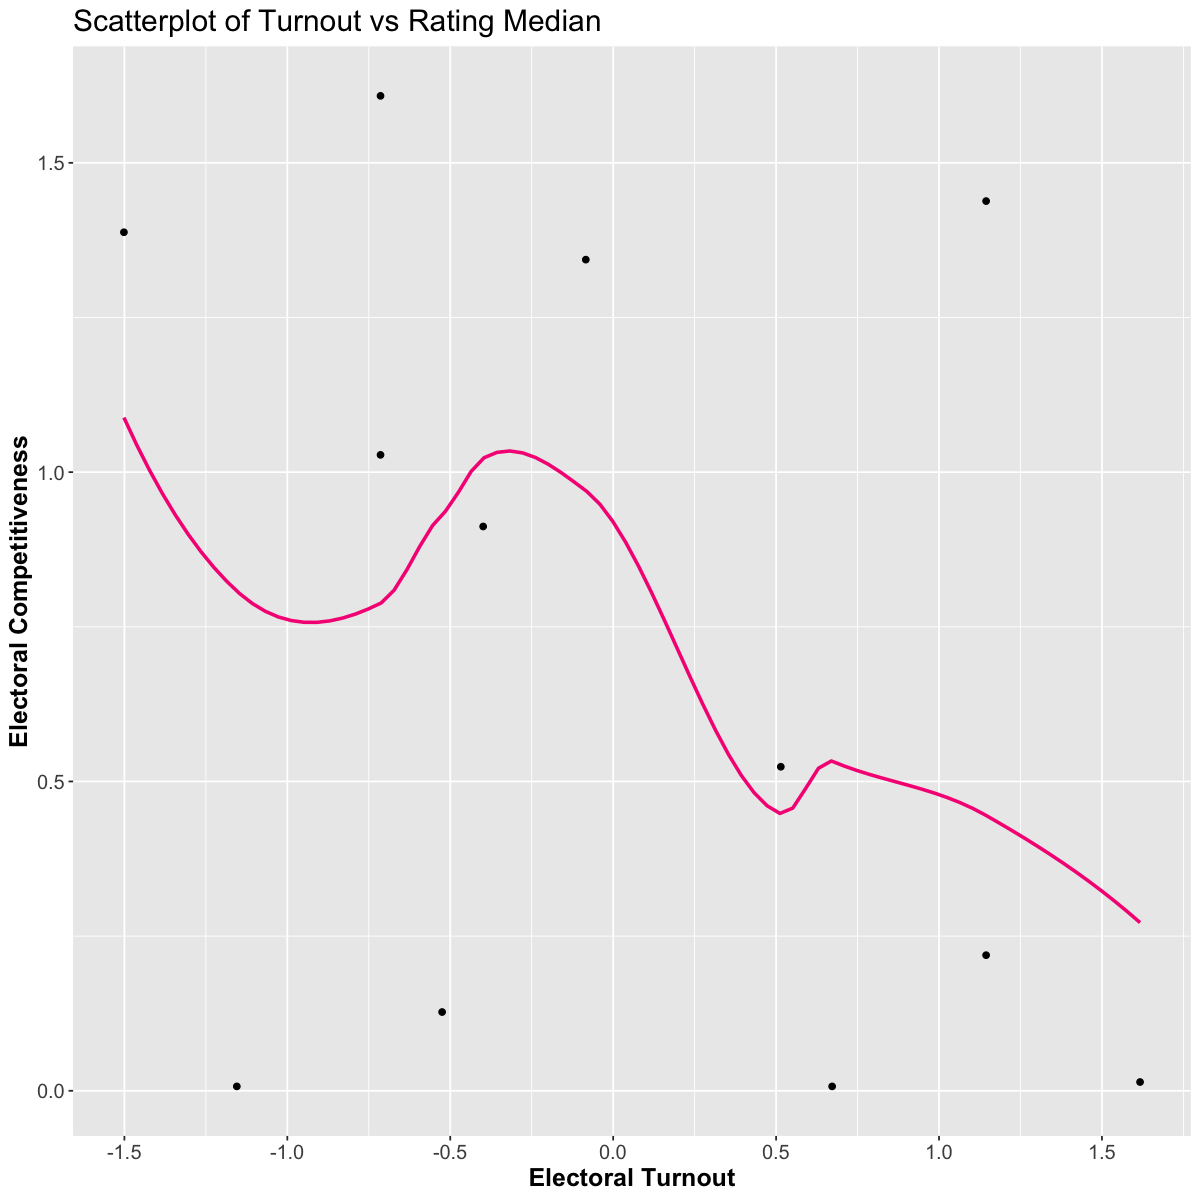

In [100]:
# Create a scatterplot with turnout and rating_median
scatterplot <- ggplot(merged_df, aes(x = turnout_scaled, y = rating_std)) +
  geom_point() +  # Add points for each data point
  labs(title = "Scatterplot of Turnout vs Rating Median",
       x = "Electoral Turnout", y = "Electoral Competitiveness") 
  # theme_minimal()

# Add a LOESS curve to visualize the relationship
scatterplot_with_loess <- scatterplot + 
  # geom_smooth(method = "loess", se = FALSE, color = "#f72585") +  # Add LOESS curve
  geom_smooth(method = "loess", span = 0.75, degree = 2, se = FALSE, color = "#f72585") +
  theme(
    text = element_text(size = 15),
    axis.title = element_text(face = "bold")) +
    scale_x_continuous(breaks = seq(-1.5, 1.65, 0.5))

scatterplot_with_loess
# ggsave("../pt_2/img_scatter_loess_scaled.png", plot = scatterplot_with_loess, width = 10, height = 10) 

## References

Michael McDonald. 2023. “National Voting Eligible Population Turnout Rates, 1789-Present (v1.1).” https://election.lab.ufl.edu/dataset/national-vep-turnout-rates-1789-present-v1-1/